<center><h1>Dateset Familiarization Using Python</h1></center>

### Python program to load the iris data from a given CSV file into a data frame (data_iris)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### print the shape of the data (number of samples, number of columns)


In [3]:
data.shape

(150, 6)

### type of the data


In [4]:
type(data)

pandas.core.frame.DataFrame

### first five rows with labels

In [5]:
data.iloc[0:5,:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### find number of features and feature names

In [6]:
data1 = data.copy()

In [7]:
data1.drop([data1.columns[0],data1.columns[-1]],axis=1,inplace=True)
num_features = data1.shape[1]
feature_names = data1.columns.tolist()
print("Number of features:", num_features)
print("Feature names:", feature_names)


Number of features: 4
Feature names: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


### description of the Iris data


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### number of categories/class labels in the data


In [9]:
print("Number of categories/class labels in the dataset: ",len(data['Species'].unique()))

Number of categories/class labels in the dataset:  3


### get the missing values and nan values (with feature and class label indexing).


In [10]:
missing_values = data.isnull().sum()
missing_indexes = [i for i, value in enumerate(missing_values) if value != 0]
missing_columns = data.columns[missing_indexes]
print("Missing Values:")
print("Features: ", missing_columns.values)
missing_rows = data[data.isnull().any(axis=1)]
print("Class labels: ", missing_rows.index.tolist())


Missing Values:
Features:  []
Class labels:  []


### view basic statistical details like percentile, mean, std etc. of iris data

In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### get number of observations of each species (setosa, versicolor,virginica) from iris data and create sub data frames for each species (data_iris_setosa, data_iris_versicolor, data_iris_virginica)

In [12]:
species_counts = data['Species'].value_counts()
print("Number of observations for each species: ")
print(species_counts)
data_iris_setosa = data[data['Species'] == 'Iris-setosa']
data_iris_versicolor = data[data['Species'] == 'Iris-versicolor']
data_iris_virginica = data[data['Species'] == 'Iris-virginica']
print(data_iris_setosa.describe())

Number of observations for each species: 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000


### drop Id column from data_iris Dataframe and create a new data frame with this modified part

In [13]:
id_dropped_data = data.drop('Id',axis=1,inplace=False)
id_dropped_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### create two date frames data_iris_feature (only with feature columns) and data_iris_species (only with species column).


In [14]:
data_iris_feature = data.iloc[:, 1:-1]
data_iris_feature

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
data_iris_species = data.iloc[:, -1:]
data_iris_species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### create a Bar plot and a Pie plot to get the frequency of the three species of the Iris data

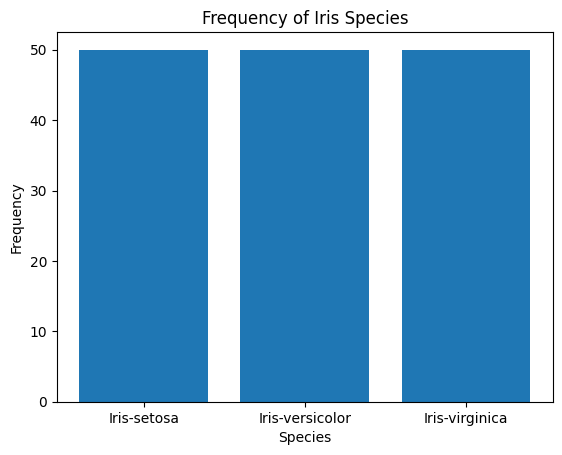

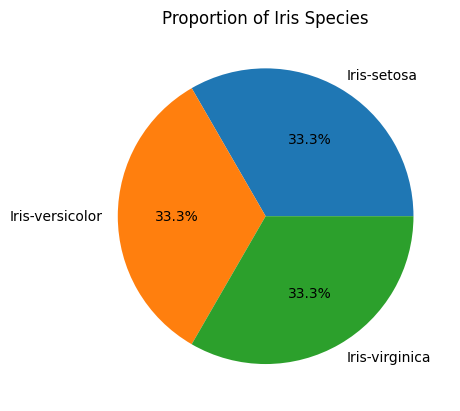

In [16]:
import matplotlib.pyplot as plt
species_counts = data['Species'].value_counts()

plt.bar(species_counts.index, species_counts.values)
plt.title('Frequency of Iris Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Iris Species')
plt.show()

### create a graph to find the relationship between the sepal length and sepal width of different species (scatter plot , give different color labels for different species)


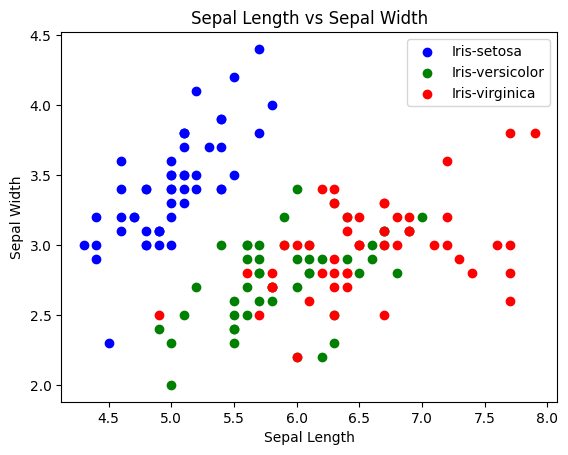

In [17]:
plt.scatter(data['SepalLengthCm'][data['Species']=='Iris-setosa'], data['SepalWidthCm'][data['Species']=='Iris-setosa'], color='blue', label='Iris-setosa')
plt.scatter(data['SepalLengthCm'][data['Species']=='Iris-versicolor'], data['SepalWidthCm'][data['Species']=='Iris-versicolor'], color='green', label='Iris-versicolor')
plt.scatter(data['SepalLengthCm'][data['Species']=='Iris-virginica'], data['SepalWidthCm'][data['Species']=='Iris-virginica'], color='red', label='Iris-virginica')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


### create a graph to see how the feature (SepalLength, SepalWidth, PetalLength, PetalWidth) are distributed for each species.Comment on it.

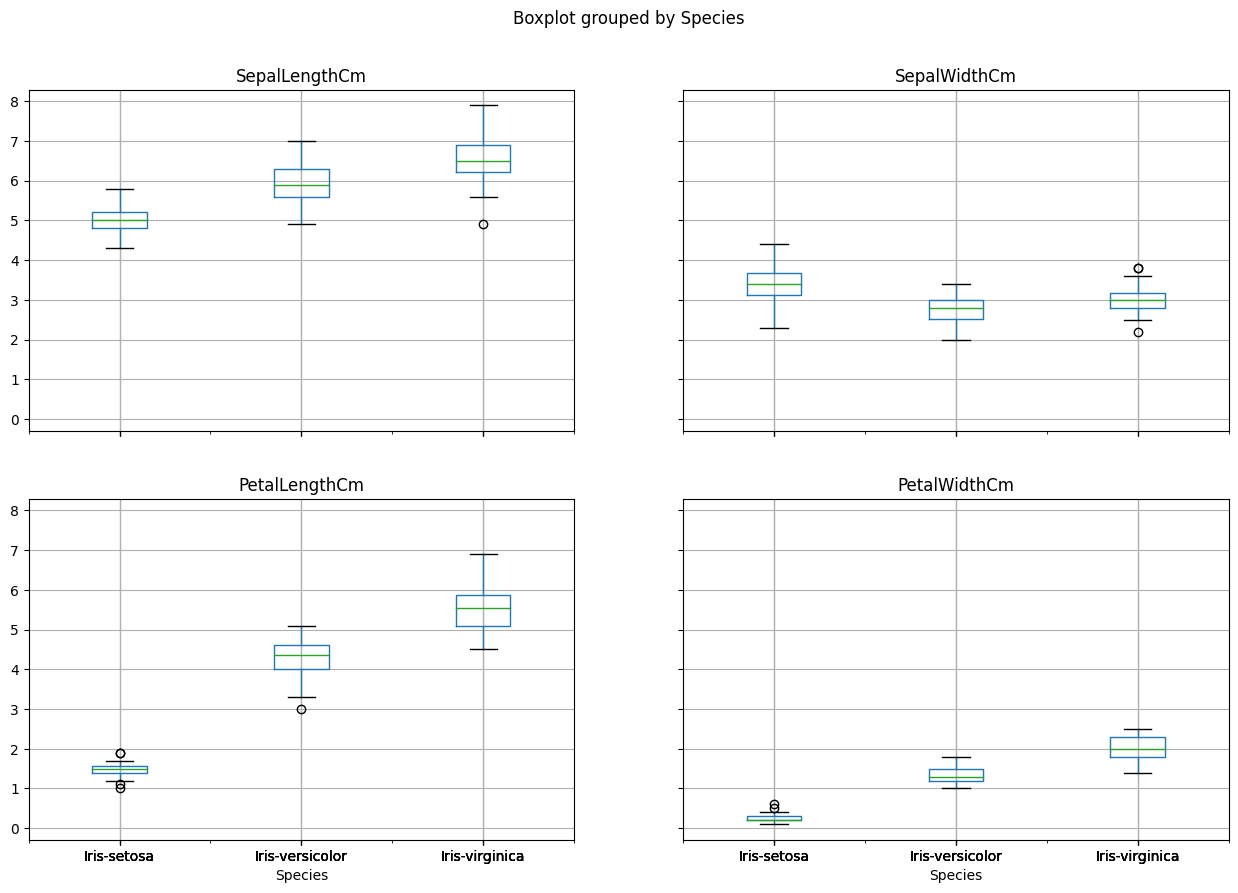

In [19]:
data.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], by='Species', figsize=(15,10))
plt.show()

Box plots gives us the insights about the distribution of the data. Comparing the sepal length and sepal width, we can see that sepal width of all the 3 classes is greater compared to the sepal length. And in the petals, in both petal length and petal width, we can see that all the 3 classes are easily distinguisable.

### create a pairplot of the iris data set and check which flower species seems to be the most separable. Comment on it.

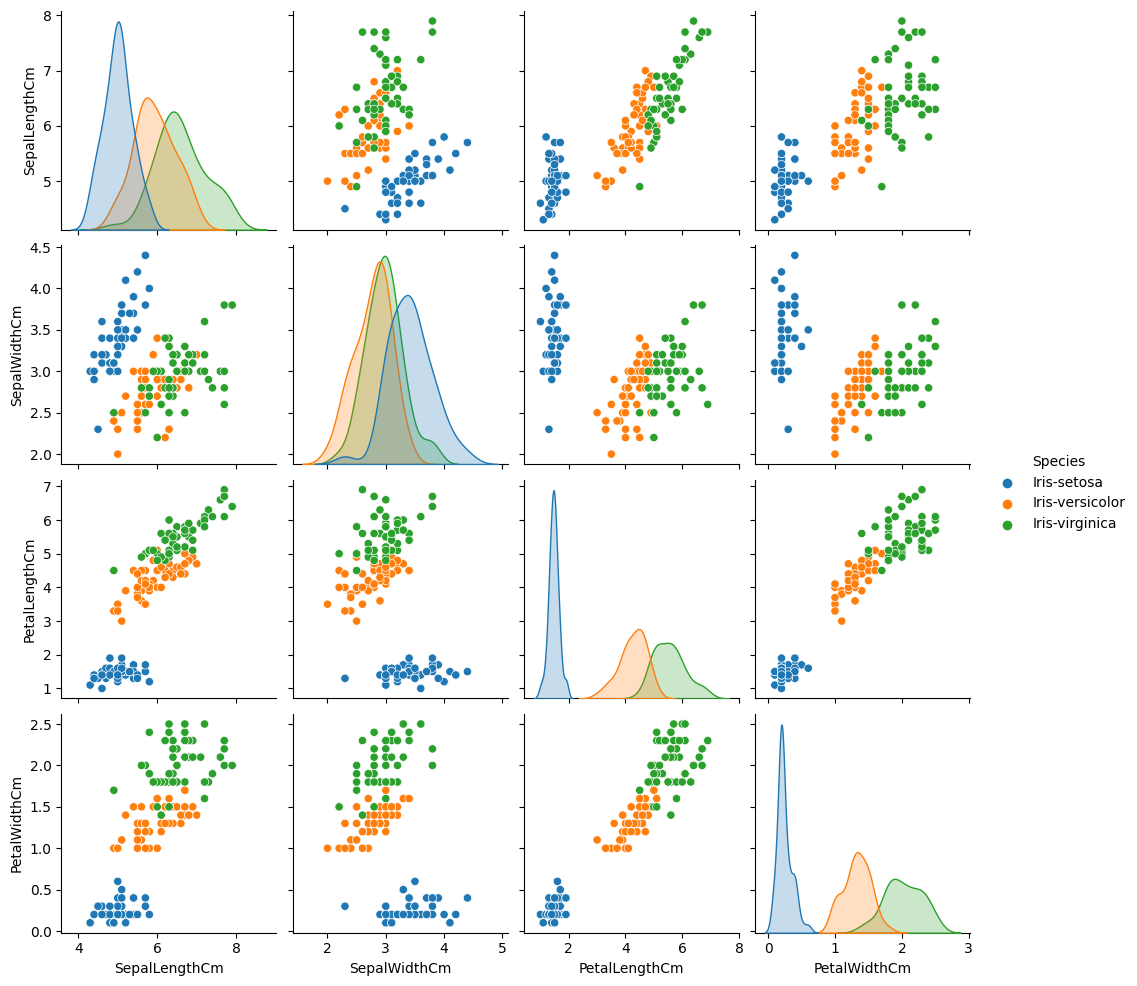

In [20]:
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']], hue='Species')
plt.show()

We can see that the setosa species is the most separable, with clear boundaries between the setosa species and the other two species for most pairs of features. The versicolor and virginica species have some overlap between them, but can still be somewhat separated by certain pairs of features.

### find the correlation between variables of iris data (between features and between feature and species). Also create a heatmap using Seaborn to present their relations. Comment on it.

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


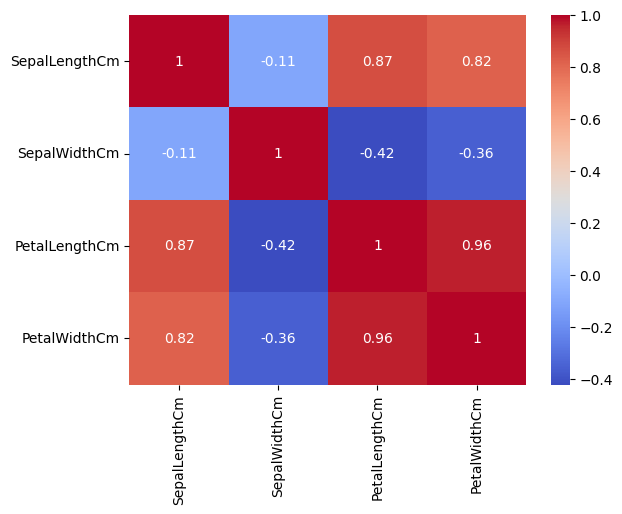

In [21]:
correlation_matrix = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
le = LabelEncoder()
y_encoded = le.fit_transform(data['Species'])
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\anied\AppData\Local\Temp\ipykernel_20444\3615957817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  species_corr = data.corrwith(pd.Series(y_encoded))


Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
dtype: float64


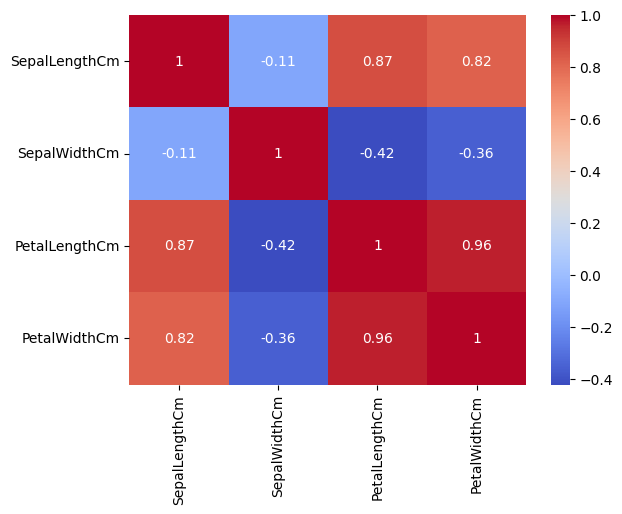

In [26]:
species_corr = data.corrwith(pd.Series(y_encoded))
print(species_corr)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot: >

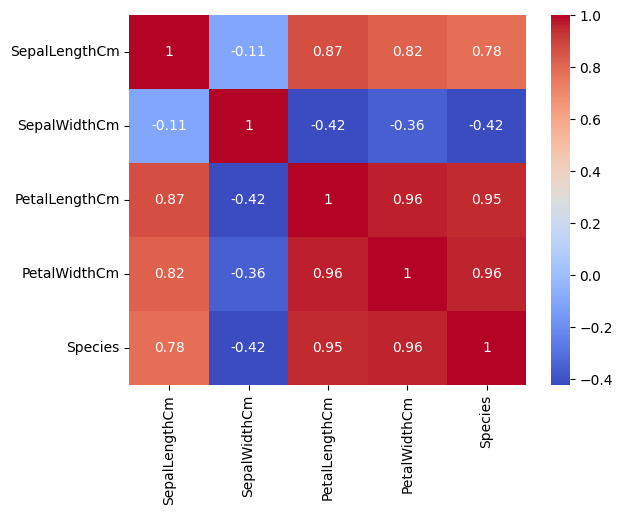

In [31]:
le = LabelEncoder()
y_encoded = le.fit_transform(data['Species'])
data_with_labels = pd.concat([data.iloc[:, 1:-1], pd.Series(y_encoded, name='Species')], axis=1)
corr_matrix = data_with_labels.corr()

import seaborn as sns
sns.heatmap(corr_matrix, annot=True,cmap= 'coolwarm')